# Predicting Graduate Admissions with Machine Learning

In this project, I delve into the realm of predictive analytics to forecast the likelihood of admission for graduate students based on various factors. The dataset, sourced from Kaggle, includes essential parameters like GRE score, TOEFL score, university rating, statement of purpose (SOP), letter of recommendation (LOR), CGPA, and research experience.

### Project Context

Cardiovascular diseases (CVDs) stand as the leading global cause of death, accounting for millions of lives annually. Heart failure, often stemming from CVDs, underscores the importance of early detection. This dataset, with its 400 entries and 8 features, provides an excellent opportunity to employ machine learning for predicting graduate admission.

### Dataset Overview

- **Number of Entries:** 400
- **Features:** GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit
- **Target Variable:** Chance of Admit

### Significance

As cardiovascular diseases continue to be a major health concern, early detection and intervention are crucial. In the context of graduate admissions, a machine learning model can aid in identifying key factors influencing admission chances, facilitating strategic decision-making.

### Model Training

I've trained a neural network model using features such as GRE score, TOEFL score, and CGPA. The model's performance is evaluated on both the training and validation sets, with a focus on the Mean Absolute Error (MAE) and R-squared value as key metrics.

### Hyperparameter Tuning

To enhance model performance, I conducted hyperparameter tuning, optimizing parameters like batch size, dropout rate, and learning rate. The best hyperparameters were identified to maximize the model's predictive capability.

### Final Model Performance

After 100 epochs of training, the main model achieved an R-squared value of approximately 71.46%, indicating a good fit to the data. Additionally, a separate visualization displays the validation loss and MAE over the training epochs.

--------------

In [4]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('data/Admission_Predict.csv')

# Investigate the dataset
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


This dataset has nine different columns:

- Serial No.: Index of each row (1-500)
- GRE Score: GRE test score (out of 340)
- TOEFL Score: TOEFL test score (out of 120)
- University Rating: Evaluated university rating (out of 5)
- SOP: Statement of Purpose Strength (out of 5)
- LOR: Letter of Recommendation Strength (out of 5)
- CGPA: Undergraduate GPA (out of 10)
- Research: Has research experience (either 0 or 1)
- Chance of Admit: Applicant’s chance of being admitted (ranging from 0 to 1)



In [7]:
# Drop 'Setial No.' column
df.drop(['Serial No.'], inplace=True, axis=1) 
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [8]:
# Check if all variables are numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [14]:
## Split the data into features (X) and labels (y)
# Assign final column to labels
y = df.iloc[:, -1]

# Assign all but the final column to features
X = df.iloc[:, :-1]

## Data Preprocessing

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer

# Instantiate ColumnTransformer using StandardScaler on numeric columns
ct = ColumnTransformer([("only numeric", StandardScaler(), X.columns)], remainder='passthrough')

# Apply scaler to training and test data
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.transform(X_test)

## Building the Model

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) # Create input layer with shape corresponding to the number of features in dataset
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear')) # Add output layer to model - one neuron since we need a single output for a regression prediction


## Initializing the optimizer and compiling the model

In [21]:
# Create an instance of the Adam optimizer with the learning rate equal to 0.01
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile model
model.compile(loss='mse', metrics=['mae'], optimizer=opt)

## Fit and evaluate the model

In [23]:
from sklearn.metrics import r2_score

# Fit the model to the training data
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
10/10 - 0s - loss: 0.0011 - mae: 0.0251 - 21ms/epoch - 2ms/step
Epoch 2/100
10/10 - 0s - loss: 9.9469e-04 - mae: 0.0245 - 21ms/epoch - 2ms/step
Epoch 3/100
10/10 - 0s - loss: 0.0012 - mae: 0.0270 - 19ms/epoch - 2ms/step
Epoch 4/100
10/10 - 0s - loss: 0.0011 - mae: 0.0265 - 17ms/epoch - 2ms/step
Epoch 5/100
10/10 - 0s - loss: 9.7974e-04 - mae: 0.0243 - 21ms/epoch - 2ms/step
Epoch 6/100
10/10 - 0s - loss: 7.9212e-04 - mae: 0.0219 - 16ms/epoch - 2ms/step
Epoch 7/100
10/10 - 0s - loss: 7.8432e-04 - mae: 0.0223 - 19ms/epoch - 2ms/step
Epoch 8/100
10/10 - 0s - loss: 7.3400e-04 - mae: 0.0202 - 19ms/epoch - 2ms/step
Epoch 9/100
10/10 - 0s - loss: 8.1650e-04 - mae: 0.0213 - 17ms/epoch - 2ms/step
Epoch 10/100
10/10 - 0s - loss: 9.0753e-04 - mae: 0.0236 - 19ms/epoch - 2ms/step
Epoch 11/100
10/10 - 0s - loss: 7.4878e-04 - mae: 0.0212 - 16ms/epoch - 2ms/step
Epoch 12/100
10/10 - 0s - loss: 7.5278e-04 - mae: 0.0214 - 21ms/epoch - 2ms/step
Epoch 13/100
10/10 - 0s - loss: 0.0010 - mae: 0.0

C:\Users\Marc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f'R-squared value: {r2}')

In [ ]:
# Save the model
model.save('admissions_model.h5')

# Plotting Model Loss per Epoch

Epoch 1/100
10/10 - 0s - loss: 3.5002e-04 - mae: 0.0139 - val_loss: 0.0071 - val_mae: 0.0586 - 96ms/epoch - 10ms/step
Epoch 2/100
10/10 - 0s - loss: 3.8714e-04 - mae: 0.0143 - val_loss: 0.0068 - val_mae: 0.0603 - 80ms/epoch - 8ms/step
Epoch 3/100
10/10 - 0s - loss: 4.6135e-04 - mae: 0.0166 - val_loss: 0.0081 - val_mae: 0.0653 - 56ms/epoch - 6ms/step
Epoch 4/100
10/10 - 0s - loss: 4.4775e-04 - mae: 0.0159 - val_loss: 0.0071 - val_mae: 0.0608 - 52ms/epoch - 5ms/step
Epoch 5/100
10/10 - 0s - loss: 5.3820e-04 - mae: 0.0183 - val_loss: 0.0070 - val_mae: 0.0580 - 57ms/epoch - 6ms/step
Epoch 6/100
10/10 - 0s - loss: 4.3174e-04 - mae: 0.0157 - val_loss: 0.0076 - val_mae: 0.0617 - 51ms/epoch - 5ms/step
Epoch 7/100
10/10 - 0s - loss: 2.9034e-04 - mae: 0.0134 - val_loss: 0.0072 - val_mae: 0.0605 - 61ms/epoch - 6ms/step
Epoch 8/100
10/10 - 0s - loss: 2.0532e-04 - mae: 0.0111 - val_loss: 0.0072 - val_mae: 0.0602 - 53ms/epoch - 5ms/step
Epoch 9/100
10/10 - 0s - loss: 2.1349e-04 - mae: 0.0112 - val_l

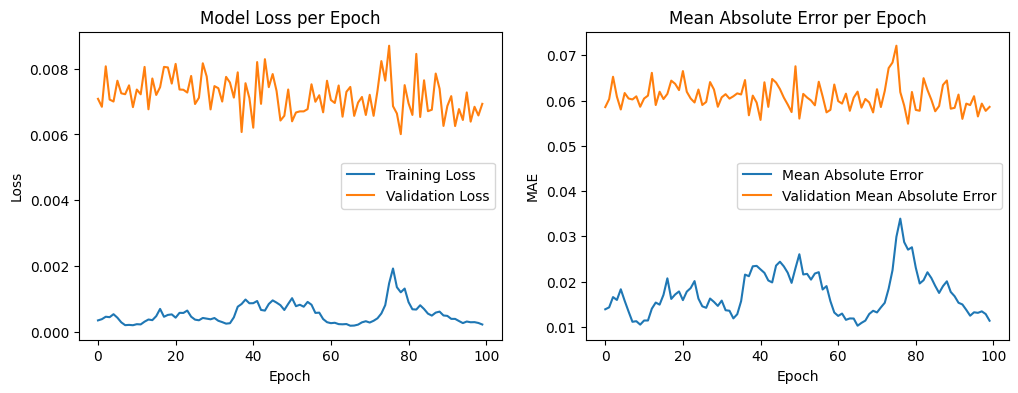

In [27]:
import matplotlib.pyplot as plt

# Save history of model training
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=2, validation_data=(X_test_scaled, y_test)).history

# Plot the model loss per epoch and mean average error per epoch
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(history['loss'], label='Training Loss')
ax1.plot(history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(history['mae'], label='Mean Absolute Error')
ax2.plot(history['val_mae'], label='Validation Mean Absolute Error')
ax2.set_title('Mean Absolute Error per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MAE')
ax2.legend()

## Hyperparameter Tuning

In [58]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

# Function to create the model with default parameters and dropout regularization
def create_model(hidden_layer1=64, hidden_layer2=32, learning_rate=0.001, dropout_rate1=0.0, dropout_rate2=0.0):
    model = Sequential()
    model.add(Dense(hidden_layer1, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(dropout_rate1))  # Dropout layer after the first hidden layer
    model.add(Dense(hidden_layer2, activation='relu'))
    model.add(Dropout(dropout_rate2))  # Dropout layer after the second hidden layer
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                  loss='mean_squared_error', metrics=['mae'])
    return model

# Define hyperparameters to tune, including dropout_rate
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'hidden_layer1': [64, 128],
    'hidden_layer2': [32, 64],
    'dropout_rate1': [0.0, 0.2, 0.5],  # Tune dropout rates
    'dropout_rate2': [0.0, 0.2, 0.5],  # Tune dropout rates   
    'batch_size': [6, 32, 64],
    'epochs': [10, 50, 100]
}

# Create KerasRegressor with default parameters
base_model = KerasRegressor(model=create_model, 
                            epochs=100, 
                            batch_size=32, 
                            verbose=0,
                            hidden_layer1=64, 
                            hidden_layer2=32, 
                            learning_rate=0.001,
                            dropout_rate=0.0)  # Default dropout rate is set to 0.0

# Perform grid search for the main model
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best hyperparameters for the main model: %s" % (grid_result.best_params_))
best_params_main_model = grid_result.best_params_

# Refit the main model with the best hyperparameters
best_model_main = grid_result.best_estimator_
best_model_main.fit(X_train_scaled, y_train)

# Evaluate the main model on the test set
y_pred_main = best_model_main.predict(X_test_scaled)
r2_main = r2_score(y_test, y_pred_main)
print(f'R-squared value (main model): {r2_main}')


Best hyperparameters for the main model: {'batch_size': 6, 'dropout_rate': 0.2, 'epochs': 50, 'hidden_layer1': 64, 'hidden_layer2': 32, 'learning_rate': 0.01}
R-squared value (main model): 0.7146143281613224
